# tables.ipynb

Build tables of the latest COVID-19 statistics for U.S. counties.

Inputs:
* `data/us_counties_clean.csv`: The contents of `data/us_counties.csv` after data cleaning by `clean.ipynb`
* `data/us_counties_clean_meta.json`: Column type metadata for reading `data/us_counties_clean.csv` with `pd.read_csv()`


In [1]:
# Initialization boilerplate
import json
import pandas as pd
import numpy as np

from typing import *

import text_extensions_for_pandas as tp

# Local file of utility functions
import util

In [2]:
# Read in the CSV file and apply the saved type information
csv_file = "data/us_counties_clean.csv"
meta_file = "data/us_counties_clean_meta.json"

# Read column type metadata
with open(meta_file) as f:
    cases_meta = json.load(f)

# Pandas does not currently support parsing datetime64 from CSV files.
# As a workaround, read the "Date" column as objects and manually 
# convert after.
cases_meta["Date"] = "object"

cases_vertical = (
    pd
    .read_csv(csv_file, dtype=cases_meta, parse_dates=["Date"])   
    .set_index(["FIPS", "Date"], verify_integrity=True)
)
cases_vertical

State   County  Population  Confirmed  Deaths  Recovered  \
FIPS  Date                                                                     
1001  2020-01-22  Alabama  Autauga       55869          0       0          0   
      2020-01-23  Alabama  Autauga       55869          0       0          0   
      2020-01-24  Alabama  Autauga       55869          0       0          0   
      2020-01-25  Alabama  Autauga       55869          0       0          0   
      2020-01-26  Alabama  Autauga       55869          0       0          0   
...                   ...      ...         ...        ...     ...        ...   
56045 2020-04-21  Wyoming   Weston        6927          0       0          0   
      2020-04-22  Wyoming   Weston        6927          0       0          0   
      2020-04-23  Wyoming   Weston        6927          0       0          0   
      2020-04-24  Wyoming   Weston        6927          0       0          0   
      2020-04-25  Wyoming   Weston        6927          0       0          0   

                  Confirmed_Outlier  Deaths_Outlier  Recovered_Outlier  
FIPS  Date                                                              
1001  2020-01-22              False           False              False  
      2020-01-23              False           False              False  
      2020-01-24              False           False              False  
      2020-01-25              False           False              False  
      2020-01-26              False           False              False  
...                             ...             ...                ...  
56045 2020-04-21              False           False              False  
      2020-04-22              False           False              False  
      2020-04-23              False           False              False  
      2020-04-24              False           False              False  
      2020-04-25              False           False              False  

[298490 rows x 9 columns]

In [3]:
# Normalize the Confirmed and Deaths counts by population.
cases = cases_vertical.copy()
cases["Confirmed_per_100"] = cases["Confirmed"] / cases["Population"] * 100
cases["Deaths_per_100"] = cases["Deaths"] / cases["Population"] * 100
cases

State   County  Population  Confirmed  Deaths  Recovered  \
FIPS  Date                                                                     
1001  2020-01-22  Alabama  Autauga       55869          0       0          0   
      2020-01-23  Alabama  Autauga       55869          0       0          0   
      2020-01-24  Alabama  Autauga       55869          0       0          0   
      2020-01-25  Alabama  Autauga       55869          0       0          0   
      2020-01-26  Alabama  Autauga       55869          0       0          0   
...                   ...      ...         ...        ...     ...        ...   
56045 2020-04-21  Wyoming   Weston        6927          0       0          0   
      2020-04-22  Wyoming   Weston        6927          0       0          0   
      2020-04-23  Wyoming   Weston        6927          0       0          0   
      2020-04-24  Wyoming   Weston        6927          0       0          0   
      2020-04-25  Wyoming   Weston        6927          0       0          0   

                  Confirmed_Outlier  Deaths_Outlier  Recovered_Outlier  \
FIPS  Date                                                               
1001  2020-01-22              False           False              False   
      2020-01-23              False           False              False   
      2020-01-24              False           False              False   
      2020-01-25              False           False              False   
      2020-01-26              False           False              False   
...                             ...             ...                ...   
56045 2020-04-21              False           False              False   
      2020-04-22              False           False              False   
      2020-04-23              False           False              False   
      2020-04-24              False           False              False   
      2020-04-25              False           False              False   

                  Confirmed_per_100  Deaths_per_100  
FIPS  Date                                           
1001  2020-01-22                0.0             0.0  
      2020-01-23                0.0             0.0  
      2020-01-24                0.0             0.0  
      2020-01-25                0.0             0.0  
      2020-01-26                0.0             0.0  
...                             ...             ...  
56045 2020-04-21                0.0             0.0  
      2020-04-22                0.0             0.0  
      2020-04-23                0.0             0.0  
      2020-04-24                0.0             0.0  
      2020-04-25                0.0             0.0  

[298490 rows x 11 columns]

In [4]:
# Pull off the most recent element of each time series.
cases_without_index = cases.reset_index()
last_date = cases_without_index["Date"].max()
cases_by_county = cases_without_index[cases_without_index["Date"] == last_date].set_index("FIPS")
cases_by_county

,Date,State,County,Population,Confirmed,Deaths,Recovered,Confirmed_Outlier,Deaths_Outlier,Recovered_Outlier,Confirmed_per_100,Deaths_per_100
FIPS,,,,,,,,,,,,
1001,2020-04-25,Alabama,Autauga,55869,36,2,0,False,False,False,0.064436,0.003580
1003,2020-04-25,Alabama,Baldwin,223234,147,3,0,False,False,False,0.065850,0.001344
1005,2020-04-25,Alabama,Barbour,24686,32,0,0,False,False,False,0.129628,0.000000
1007,2020-04-25,Alabama,Bibb,22394,34,0,0,False,False,False,0.151826,0.000000
1009,2020-04-25,Alabama,Blount,57826,31,0,0,False,False,False,0.053609,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2020-04-25,Wyoming,Sweetwater,42343,16,0,0,False,False,False,0.037787,0.000000
56039,2020-04-25,Wyoming,Teton,23464,95,0,0,False,False,False,0.404876,0.000000
56041,2020-04-25,Wyoming,Uinta,20226,7,0,0,False,False,False,0.034609,0.000000


In [5]:
# Build a second table of the same data aggregated at the state level
cases_by_state = (cases_by_county
 .groupby("State")
 .aggregate({
     "Population": "sum",
     "Confirmed": "sum",
     "Deaths": "sum"
 }))
cases_by_state["Confirmed_per_100"] = cases_by_state["Confirmed"] / cases_by_state["Population"] * 100
cases_by_state["Deaths_per_100"] = cases_by_state["Deaths"] / cases_by_state["Population"] * 100

cases_by_state = cases_by_state[["Population", "Confirmed", "Deaths", \
                                 "Confirmed_per_100", "Deaths_per_100"]]
cases_by_state

,Population,Confirmed,Deaths,Confirmed_per_100,Deaths_per_100
State,,,,,
Alabama,4903185,6026,209,0.122900,0.004263
Alaska,731545,339,5,0.046340,0.000683
Arizona,7278717,6286,273,0.086361,0.003751
Arkansas,3017804,2709,48,0.089767,0.001591
California,39512223,42368,1687,0.107228,0.004270
Colorado,5758736,12837,680,0.222914,0.011808
Connecticut,3565287,24061,1859,0.674869,0.052142
Delaware,973764,3573,112,0.366927,0.011502
District of Columbia,705749,3699,165,0.524124,0.023379


In [6]:
# Now our data prep is done and we can start analyzing.

# The latest nationwide totals
cases_by_state[["Confirmed", "Deaths"]].sum()

Confirmed    928642
Deaths        53091
dtype: int64

In [7]:
# Today's nationwide totals, computed from the county-level data
cases_by_county[["Confirmed", "Deaths"]].sum()

Confirmed    928642
Deaths        53091
dtype: int64

In [8]:
# Top 10 states by confirmed cases:
cases_by_state.sort_values("Confirmed", ascending=False).head(10)

,Population,Confirmed,Deaths,Confirmed_per_100,Deaths_per_100
State,,,,,
New York,19453561,282140,22007,1.450326,0.113126
New Jersey,8882190,104966,5914,1.181758,0.066583
Massachusetts,6892503,52571,2716,0.762727,0.039405
California,39512223,42368,1687,0.107228,0.004270
Illinois,12671821,41503,1874,0.327522,0.014789
Pennsylvania,12801989,41153,1793,0.321458,0.014006
Michigan,9986857,35946,3122,0.359933,0.031261
Florida,21477737,30838,1055,0.143581,0.004912
Louisiana,4648794,26449,1644,0.568943,0.035364


In [9]:
# Top 10 states by confirmed cases per 100 residents
cases_by_state.sort_values("Confirmed_per_100", ascending=False).head(10)

,Population,Confirmed,Deaths,Confirmed_per_100,Deaths_per_100
State,,,,,
New York,19453561,282140,22007,1.450326,0.113126
New Jersey,8882190,104966,5914,1.181758,0.066583
Massachusetts,6892503,52571,2716,0.762727,0.039405
Connecticut,3565287,24061,1859,0.674869,0.052142
Louisiana,4648794,26449,1644,0.568943,0.035364
Rhode Island,1059361,5931,0,0.559866,0.000000
District of Columbia,705749,3699,165,0.524124,0.023379
Delaware,973764,3573,112,0.366927,0.011502
Michigan,9986857,35946,3122,0.359933,0.031261


In [10]:
# Top 10 states by deaths per 100 residents
cases_by_state.sort_values("Deaths_per_100", ascending=False).head(10)

,Population,Confirmed,Deaths,Confirmed_per_100,Deaths_per_100
State,,,,,
New York,19453561,282140,22007,1.450326,0.113126
New Jersey,8882190,104966,5914,1.181758,0.066583
Connecticut,3565287,24061,1859,0.674869,0.052142
Massachusetts,6892503,52571,2716,0.762727,0.039405
Louisiana,4648794,26449,1644,0.568943,0.035364
Michigan,9986857,35946,3122,0.359933,0.031261
District of Columbia,705749,3699,165,0.524124,0.023379
Illinois,12671821,41503,1874,0.327522,0.014789
Pennsylvania,12801989,41153,1793,0.321458,0.014006


In [11]:
# Top 20 counties by total confirmed cases.
cases_by_county.sort_values("Confirmed", ascending=False).head(20)

,Date,State,County,Population,Confirmed,Deaths,Recovered,Confirmed_Outlier,Deaths_Outlier,Recovered_Outlier,Confirmed_per_100,Deaths_per_100
FIPS,,,,,,,,,,,,
36047,2020-04-25,New York,Kings,2559903,47628,5258,0,False,False,False,1.860539,0.205398
36081,2020-04-25,New York,Queens,2253858,41934,4630,0,False,False,False,1.860543,0.205426
36059,2020-04-25,New York,Nassau,1356924,33798,1558,0,False,False,False,2.490781,0.114819
36103,2020-04-25,New York,Suffolk,1476601,31368,1042,0,False,False,False,2.124338,0.070567
36061,2020-04-25,New York,New York,1628706,30303,3345,0,False,False,False,1.860557,0.205378
17031,2020-04-25,Illinois,Cook,5150233,29058,1267,0,False,False,False,0.564207,0.024601
36119,2020-04-25,New York,Westchester,967506,27231,920,0,False,False,False,2.814556,0.095090
36005,2020-04-25,New York,Bronx,1418207,26386,2913,0,False,False,False,1.860518,0.205400
6037,2020-04-25,California,Los Angeles,10039107,19133,895,0,False,False,False,0.190585,0.008915


In [12]:
# Top 20 counties by confirmed cases per 100 residents
cases_by_county.sort_values("Confirmed_per_100", ascending=False).head(20)

,Date,State,County,Population,Confirmed,Deaths,Recovered,Confirmed_Outlier,Deaths_Outlier,Recovered_Outlier,Confirmed_per_100,Deaths_per_100
FIPS,,,,,,,,,,,,
5079,2020-04-25,Arkansas,Lincoln,13024,721,0,0,False,False,False,5.535934,0.000000
47007,2020-04-25,Tennessee,Bledsoe,15064,586,0,0,False,False,False,3.890069,0.000000
36087,2020-04-25,New York,Rockland,325789,11091,453,0,False,False,False,3.404351,0.139047
39101,2020-04-25,Ohio,Marion,65093,2172,4,0,False,False,False,3.336764,0.006145
39129,2020-04-25,Ohio,Pickaway,58457,1662,5,0,False,False,False,2.843115,0.008553
36119,2020-04-25,New York,Westchester,967506,27231,920,0,False,False,False,2.814556,0.095090
36059,2020-04-25,New York,Nassau,1356924,33798,1558,0,False,False,False,2.490781,0.114819
19115,2020-04-25,Iowa,Louisa,11035,261,2,0,False,False,False,2.365202,0.018124
13243,2020-04-25,Georgia,Randolph,6778,153,19,0,False,False,False,2.257303,0.280319


In [13]:
# Top 20 counties by *deaths* per 100 residents
cases_by_county.sort_values("Deaths_per_100", ascending=False).head(20)

,Date,State,County,Population,Confirmed,Deaths,Recovered,Confirmed_Outlier,Deaths_Outlier,Recovered_Outlier,Confirmed_per_100,Deaths_per_100
FIPS,,,,,,,,,,,,
13243,2020-04-25,Georgia,Randolph,6778,153,19,0,False,False,False,2.257303,0.280319
36081,2020-04-25,New York,Queens,2253858,41934,4630,0,False,False,False,1.860543,0.205426
36085,2020-04-25,New York,Richmond,476143,8859,978,0,False,False,False,1.860575,0.205400
36005,2020-04-25,New York,Bronx,1418207,26386,2913,0,False,False,False,1.860518,0.205400
36047,2020-04-25,New York,Kings,2559903,47628,5258,0,False,False,False,1.860539,0.205398
36061,2020-04-25,New York,New York,1628706,30303,3345,0,False,False,False,1.860557,0.205378
13273,2020-04-25,Georgia,Terrell,8531,165,17,0,False,False,False,1.934123,0.199273
22095,2020-04-25,Louisiana,St. John the Baptist,42837,747,64,0,False,False,False,1.743820,0.149404
13099,2020-04-25,Georgia,Early,10190,194,15,0,False,False,False,1.903827,0.147203


In [14]:
# Group together counties from each decile of population
quantiles = cases_by_county["Population"].quantile(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Start by binning the latest data.
cases_with_bin = cases_by_county.copy()
cases_with_bin["pop_bin"] = pd.cut(cases_with_bin["Population"], 
                                   bins=([0.0] + quantiles.to_list()))

cases_by_bin = cases_with_bin.groupby(["Date", "pop_bin"]).aggregate({
    "Confirmed": "sum",
    "Deaths": "sum",
    "Population": "sum"
})
cases_by_bin["Confirmed_per_100"] = cases_by_bin["Confirmed"] / cases_by_bin["Population"] * 100
cases_by_bin["Deaths_per_100"] = cases_by_bin["Deaths"] / cases_by_bin["Population"] * 100
cases_by_bin = cases_by_bin.reset_index()
cases_by_bin

,Date,pop_bin,Confirmed,Deaths,Population,Confirmed_per_100,Deaths_per_100
0,2020-04-25,"(0.0, 4992.2]",405,16,872420,0.046423,0.001834
1,2020-04-25,"(4992.2, 8808.4]",1905,117,2184561,0.087203,0.005356
2,2020-04-25,"(8808.4, 13335.6]",3601,95,3456224,0.104189,0.002749
3,2020-04-25,"(13335.6, 18693.0]",4812,163,5000037,0.096239,0.003260
4,2020-04-25,"(18693.0, 25726.0]",9741,351,6934301,0.140476,0.005062
5,2020-04-25,"(25726.0, 36743.0]",10484,452,9707534,0.107999,0.004656
6,2020-04-25,"(36743.0, 54018.7]",15337,676,13857842,0.110674,0.004878
7,2020-04-25,"(54018.7, 94275.6]",26639,977,22136348,0.120341,0.004414
8,2020-04-25,"(94275.6, 213707.3]",59791,2662,44626025,0.133982,0.005965
9,2020-04-25,"(213707.3, 10039107.0]",795927,47582,219464231,0.362668,0.021681


In [15]:
# Make sure we didn't drop any counties from the above table
confirmed_before = cases_by_county["Confirmed"].sum()
confirmed_after = cases_by_bin["Confirmed"].sum()
if confirmed_before != confirmed_after:
    raise ValueError(f"{confirmed_before} should equal {confirmed_after} "
                     f" (difference is {confirmed_before - confirmed_after})")

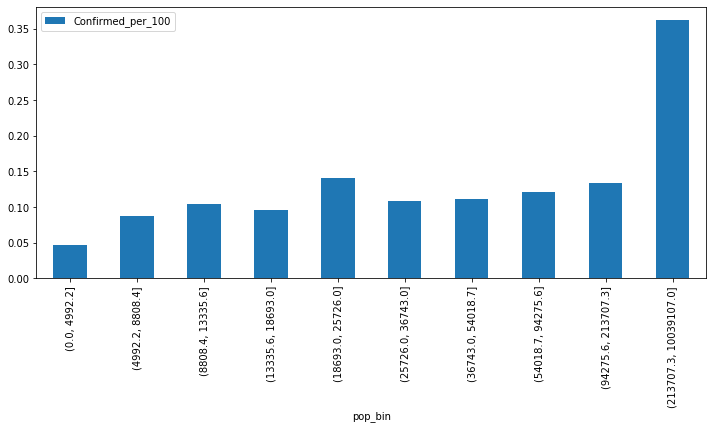

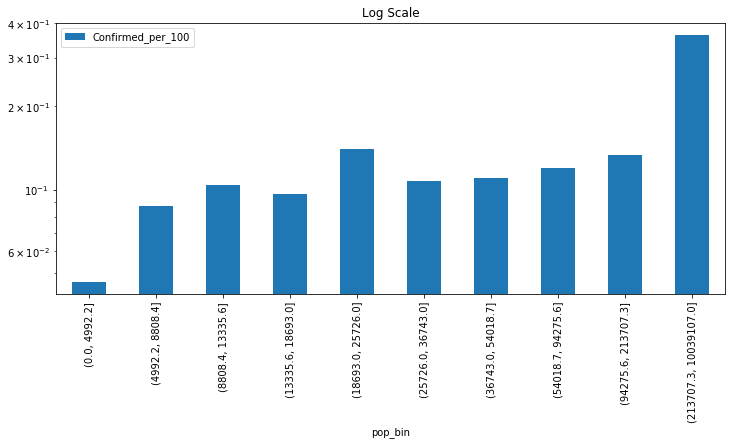

In [16]:
# Plot the relationship between confirmed cases per 100 residents and population.
FIGSIZE=(12,5)
cases_by_bin.plot.bar(x="pop_bin", y="Confirmed_per_100", figsize=FIGSIZE)
cases_by_bin.plot.bar(x="pop_bin", y="Confirmed_per_100", figsize=FIGSIZE,
                      logy=True, title="Log Scale")

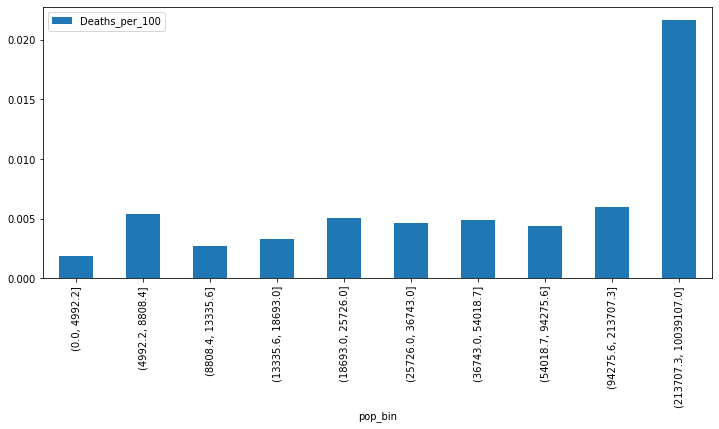

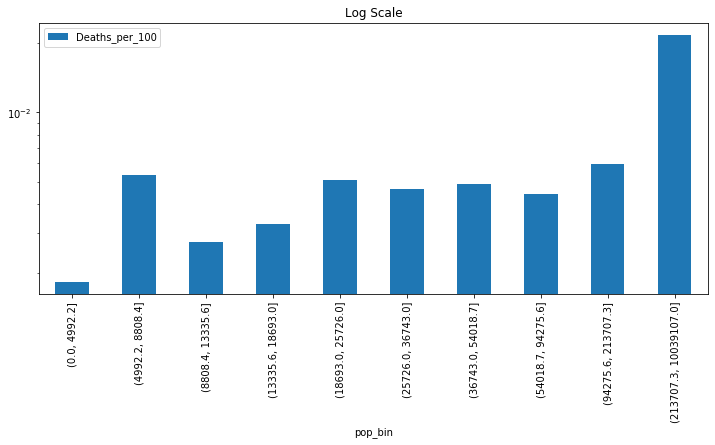

In [17]:
# Plot the relationship between deaths per 100 residents and population
cases_by_bin.plot.bar(x="pop_bin", y="Deaths_per_100", figsize=FIGSIZE)
cases_by_bin.plot.bar(x="pop_bin", y="Deaths_per_100", figsize=FIGSIZE,
                      logy=True, title="Log Scale")